In [1]:
import os
import sys
sys.path.append("./Methods")

import urllib.request
from urllib.request import urlretrieve
import geopandas as gpd
from methods import *
from DownloadFiles import *


In [2]:
# Download the geo data zip file
Geourl = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip"
download_zip_file(Geourl, output_file="downloads/geo_data_country.zip")

# Unzip the file & Read the shapefile into a geopandas dataframe
zipfile = "zip://downloads/geo_data_country.zip!/ne_50m_admin_0_countries.shp"
geodata = gpd.read_file(zipfile)

File already exists, skipping download


In [3]:
# Read the agricultural data into a Pandas DataFrame
agri_df = Agros_class()

# Replace the country names in the agricultural data with the names in the geo data
agri_df.data['Entity'] = agri_df.data['Entity'].replace(agri_df.merge_dict) 

# Merge the two dataframes
merge_df = geodata.merge(agri_df.data, left_on="SOVEREIGNT", right_on="Entity")

# Plot the tfp variable on a world map
merge_df.plot(column="tfp", cmap="Accent", legend=True, figsize=(20,10),\
    legend_kwds={'label': "Agricultural total factor productivity (USDA) by country"})


File already exists, skipping download
Data loaded successfully into a Pandas DataFrame


<Axes: >

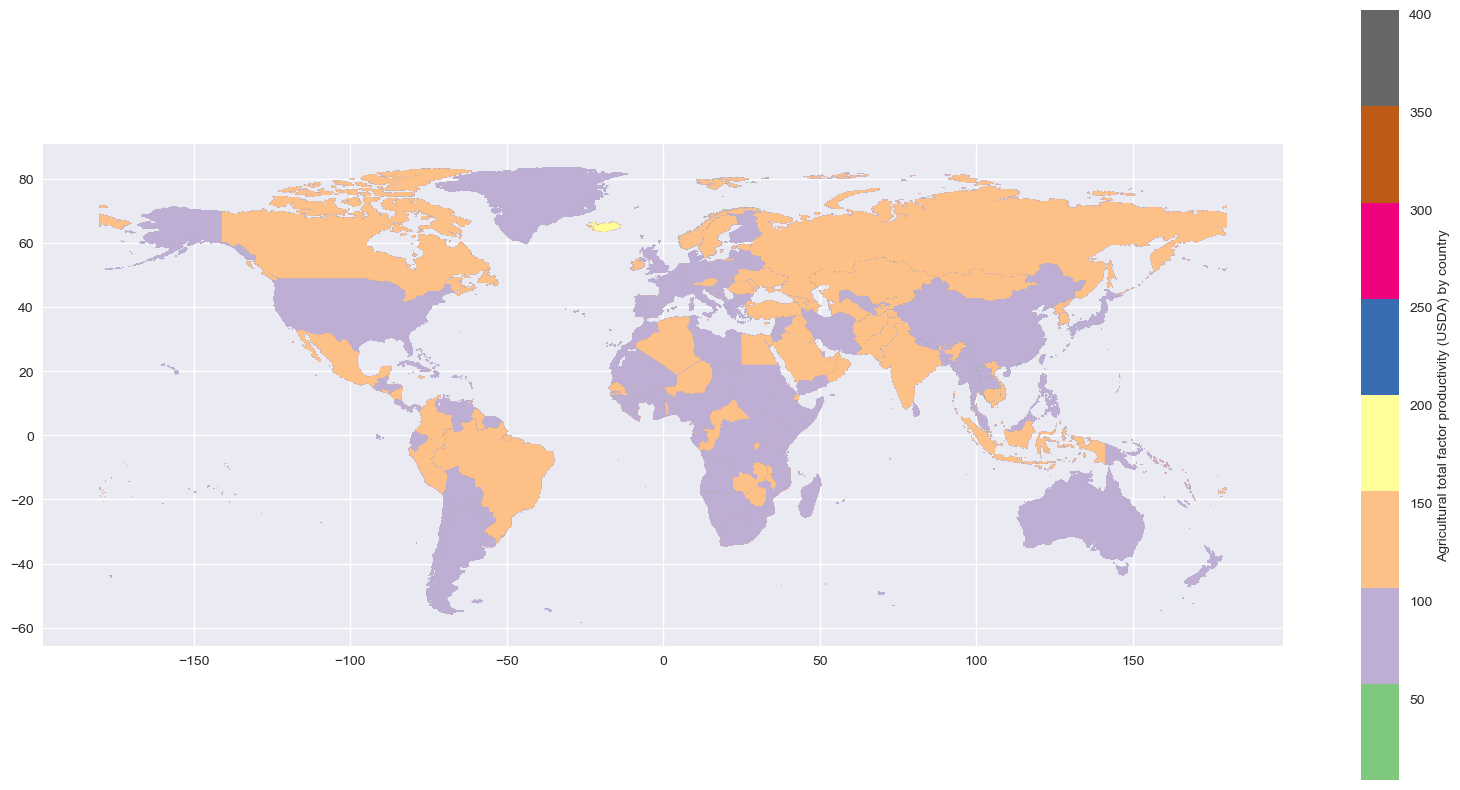

In [78]:
# Could be Ignored (to list the unmatched countries)
geo = geodata["SOVEREIGNT"].unique()
agri = agri_df.data["Entity"].unique()
set_diff = np.setdiff1d(geo, agri)
print("/n The following countries are in the geo data but not in the agricultural data:", set_diff)
#also could be deleted after you guys understand the code :)

/n The following countries are in the geo data but not in the agricultural data: ['Andorra' 'Antarctica' 'Antigua and Barbuda' 'Barbados' 'Cabo Verde'
 'Democratic Republic of the Congo' 'Dominica' 'East Timor'
 'Federated States of Micronesia' 'Grenada' 'Ivory Coast' 'Kashmir'
 'Kiribati' 'Kosovo' 'Liechtenstein' 'Maldives' 'Marshall Islands'
 'Monaco' 'Nauru' 'Northern Cyprus' 'Palau' 'Republic of Serbia'
 'Republic of the Congo' 'Saint Kitts and Nevis' 'Saint Lucia'
 'Saint Vincent and the Grenadines' 'Samoa' 'San Marino' 'Seychelles'
 'Singapore' 'Somaliland' 'São Tomé and Principe' 'The Bahamas' 'Tonga'
 'Tuvalu' 'United Republic of Tanzania' 'United States of America'
 'Vatican' 'Western Sahara' 'eSwatini']
